# Anime Analysis

### Link for my Tableau workbook with another take on the visualizations done here
- [Tableau link](https://public.tableau.com/app/profile/mattmrc/viz/Livro1_15979281387450/Dashboard)

PS: remember to always view in fullscreen, in case some charts and descriptions might be overlapping.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Importing the datasets
animes = pd.read_csv('/Users/mattymrc/Desktop/Ironhack/4 - Projects/ironhack-projects/Project-Week-6/your-project/Datasets/\
myanimelist-dataset-animes-profiles-reviews/animes.csv')

profiles = pd.read_csv('/Users/mattymrc/Desktop/Ironhack/4 - Projects/ironhack-projects/Project-Week-6/your-project/Datasets/\
myanimelist-dataset-animes-profiles-reviews/profiles.csv')

reviews = pd.read_csv('/Users/mattymrc/Desktop/Ironhack/4 - Projects/ironhack-projects/Project-Week-6/your-project/Datasets/\
myanimelist-dataset-animes-profiles-reviews/reviews.csv')

## 1. Taking a look at the data

In [32]:
animes.head()

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...


In [33]:
profiles.head()

,profile,gender,birthday,favorites_anime,link
0,DesolatePsyche,Male,"Oct 2, 1994","['33352', '25013', '5530', '33674', '1482', '2...",https://myanimelist.net/profile/DesolatePsyche
1,baekbeans,Female,"Nov 10, 2000","['11061', '31964', '853', '20583', '918', '925...",https://myanimelist.net/profile/baekbeans
2,skrn,NaN,NaN,"['918', '2904', '11741', '17074', '23273', '32...",https://myanimelist.net/profile/skrn
3,edgewalker00,Male,Sep 5,"['5680', '849', '2904', '3588', '37349']",https://myanimelist.net/profile/edgewalker00
4,aManOfCulture99,Male,"Oct 30, 1999","['4181', '7791', '9617', '5680', '2167', '4382...",https://myanimelist.net/profile/aManOfCulture99


In [34]:
reviews.head()

,uid,profile,anime_uid,text,score,scores,link
0,255938,DesolatePsyche,34096,\n \n \n \n ...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8...",https://myanimelist.net/reviews.php?id=255938
1,259117,baekbeans,34599,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=259117
2,253664,skrn,28891,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664
3,8254,edgewalker00,2904,\n \n \n \n ...,9,"{'Overall': '9', 'Story': '9', 'Animation': '9...",https://myanimelist.net/reviews.php?id=8254
4,291149,aManOfCulture99,4181,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=291149


## 2. Data Cleaning

In [35]:
# Dropping some columns that I know right away won't be used
animes.drop(columns = ['img_url', 'link'], inplace = True)
profiles.drop(columns = 'link', inplace = True)
reviews.drop(columns = ['link', 'scores'], inplace = True)

In [36]:
# Renaming some columns to be clearer
animes.rename(columns = {'uid': 'anime_id'}, inplace = True)

profiles.rename(columns = {'favorites_anime': 'favorite_animes', 'profile': 'username'}, inplace = True)

reviews.rename(columns = {'uid': 'user_id', 'profile': 'username', 'anime_uid': 'anime_id', 'score:': 'user_score', 'text': 'user_review'}, inplace = True)

In [37]:
# Checking the DFs again
display(animes.head())
display(profiles.head())
display(reviews.head())

,anime_id,title,synopsis,genre,aired,episodes,members,popularity,ranked,score
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83


,username,gender,birthday,favorite_animes
0,DesolatePsyche,Male,"Oct 2, 1994","['33352', '25013', '5530', '33674', '1482', '2..."
1,baekbeans,Female,"Nov 10, 2000","['11061', '31964', '853', '20583', '918', '925..."
2,skrn,NaN,NaN,"['918', '2904', '11741', '17074', '23273', '32..."
3,edgewalker00,Male,Sep 5,"['5680', '849', '2904', '3588', '37349']"
4,aManOfCulture99,Male,"Oct 30, 1999","['4181', '7791', '9617', '5680', '2167', '4382..."


,user_id,username,anime_id,user_review,score
0,255938,DesolatePsyche,34096,\n \n \n \n ...,8
1,259117,baekbeans,34599,\n \n \n \n ...,10
2,253664,skrn,28891,\n \n \n \n ...,7
3,8254,edgewalker00,2904,\n \n \n \n ...,9
4,291149,aManOfCulture99,4181,\n \n \n \n ...,10


## 2.1 Testing memory reduction by downcasting ints, floats and objects

### Animes Test

In [38]:
# Checking the memory usage of each dataset
animes.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19311 entries, 0 to 19310
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   anime_id    19311 non-null  int64  
 1   title       19311 non-null  object 
 2   synopsis    18336 non-null  object 
 3   genre       19311 non-null  object 
 4   aired       19311 non-null  object 
 5   episodes    18605 non-null  float64
 6   members     19311 non-null  int64  
 7   popularity  19311 non-null  int64  
 8   ranked      16099 non-null  float64
 9   score       18732 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 15.6 MB


In [39]:
# List of the column names
col_names = animes.columns.tolist()

# List of the columns that are of object type
obj_cols = [i for i in col_names if animes[i].dtypes=='object']

# List of the columns that are of integer type
int_cols = [i for i in col_names if animes[i].dtypes=='int']

# List of the columns that are of float type
float_cols = [i for i in col_names if animes[i].dtypes=='float']


# Downcasting the integer columns to a smaller base to save memory
for i in int_cols:
    animes[i] = pd.to_numeric(animes[i], downcast='integer')
    
    
# Downcasting the float columns to a smaller base to save memory
for i in float_cols:
    animes[i] = pd.to_numeric(animes[i], downcast='float')
    

# Downcasting the object columns to a string type to save memory
for i in obj_cols:
    animes[i] = animes[i].astype('string')

In [40]:
# Checking the final memory usage
animes.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19311 entries, 0 to 19310
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   anime_id    19311 non-null  int32  
 1   title       19311 non-null  string 
 2   synopsis    18336 non-null  string 
 3   genre       19311 non-null  string 
 4   aired       19311 non-null  string 
 5   episodes    18605 non-null  float32
 6   members     19311 non-null  int32  
 7   popularity  19311 non-null  int16  
 8   ranked      16099 non-null  float32
 9   score       18732 non-null  float32
dtypes: float32(3), int16(1), int32(2), string(4)
memory usage: 1018.5 KB


### Profiles Test

In [41]:
# Checking inital memory usage
profiles.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81727 entries, 0 to 81726
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   username         81727 non-null  object
 1   gender           53856 non-null  object
 2   birthday         46807 non-null  object
 3   favorite_animes  81727 non-null  object
dtypes: object(4)
memory usage: 20.7 MB


In [42]:
# List of the column names
col_names = profiles.columns.tolist()

# List of the columns that are of object type
obj_cols = [i for i in col_names if profiles[i].dtypes=='object']


# Downcasting the object columns to a string type to save memory
for i in obj_cols:
    profiles[i] = profiles[i].astype('string')

In [43]:
# Checking the final memory usage
profiles.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81727 entries, 0 to 81726
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   username         81727 non-null  string
 1   gender           53856 non-null  string
 2   birthday         46807 non-null  string
 3   favorite_animes  81727 non-null  string
dtypes: string(4)
memory usage: 2.5 MB


### Reviews Test

In [44]:
# Checking the initial memory usage
reviews.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192112 entries, 0 to 192111
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      192112 non-null  int64 
 1   username     192112 non-null  object
 2   anime_id     192112 non-null  int64 
 3   user_review  192112 non-null  object
 4   score        192112 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 812.2 MB


In [45]:
# List of the column names
col_names = reviews.columns.tolist()

# List of the columns that are of object type
obj_cols = [i for i in col_names if reviews[i].dtypes=='object']

# List of the columns that are of integer type
int_cols = [i for i in col_names if reviews[i].dtypes=='int']


# Downcasting the integer columns to a smaller base to save memory
for i in int_cols:
    reviews[i] = pd.to_numeric(reviews[i], downcast='integer')
    

# Downcasting the object columns to a string type to save memory
for i in obj_cols:
    reviews[i] = reviews[i].astype('string')

In [46]:
# Checking the final memory usage
reviews.info(memory_usage='deep')  # huge reduction - went from 812.2 MB to 4.6 MB. Almost a 99.5% reduction in memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192112 entries, 0 to 192111
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      192112 non-null  int32 
 1   username     192112 non-null  string
 2   anime_id     192112 non-null  int32 
 3   user_review  192112 non-null  string
 4   score        192112 non-null  int8  
dtypes: int32(2), int8(1), string(2)
memory usage: 4.6 MB


In [52]:
(4.6 / 812.2 * 100) - 100

-99.433637035213

### Thoughts on the memory reduction

I think it is amazing how much memory we can save just by downcasting types like this. However, I'm not sure if it'll have any negative impacts in some kinds of analysis? Maybe not the numbers, but perhaps the string type? Will have to look further into that.

## 2.2 Checking shapes and duplicates in all DFs

In [53]:
# Checking the shapes and duplicates in all DFs

# Creating a function to avoid having to write the same thing 3 times
def shape_dupes_func(df_string_name, df):
    print(f'{df_string_name} DF info:')
    print(f'Shape: {df.shape}')
    print(f'Number of duplicates: {df.duplicated().sum()}')
    print(f'Percentage of duplicates: {round(df.duplicated().sum() / len(df) * 100, 2)}%')

# Calling the function to see the results for each DF
shape_dupes_func('Animes', animes)
print('')
shape_dupes_func('Profiles', profiles)
print('')
shape_dupes_func('Reviews', reviews)
# As we can see, there are way too many duplicates, for some reason, which is unfortunate, as I'll have to let go of all that data


# Initial take at the function
#def dupe_finder(df_name, df):
#    return f'Number of duplicates in {df_name} DF: {df.duplicated().sum()}. Percent of duplicates in the DF: {round(df.duplicated().sum() / len(df) * 100, 2)}%'

Animes DF info:
Shape: (19311, 10)
Number of duplicates: 2943
Percentage of duplicates: 15.24%

Profiles DF info:
Shape: (81727, 4)
Number of duplicates: 33825
Percentage of duplicates: 41.39%

Reviews DF info:
Shape: (192112, 5)
Number of duplicates: 61593
Percentage of duplicates: 32.06%


In [54]:
# Dropping all duplicates
animes.drop_duplicates(inplace = True)
profiles.drop_duplicates(inplace = True)
reviews.drop_duplicates(inplace = True)

In [55]:
# Making sure all dupes were deleted
shape_dupes_func('Animes', animes)
print('')
shape_dupes_func('Profiles', profiles)
print('')
shape_dupes_func('Reviews', reviews)

Animes DF info:
Shape: (16368, 10)
Number of duplicates: 0
Percentage of duplicates: 0.0%

Profiles DF info:
Shape: (47902, 4)
Number of duplicates: 0
Percentage of duplicates: 0.0%

Reviews DF info:
Shape: (130519, 5)
Number of duplicates: 0
Percentage of duplicates: 0.0%


## 2.3 Checking for null values

In [56]:
# Checking for null values

# Function to check for the percentage of null values
def null_checker(df_str_name, df):
    #return round(df.isna().sum() / len(df) * 100, 2)
    print(f'{df_str_name} DF info:')
    print(f'Percentage of null values per column: \n{round(df.isna().sum() / len(df) * 100, 2).sort_values(ascending = False)}')
    
    
null_checker('Animes', animes)  # some nulls, but not much, thankfully
print('')

null_checker('Profiles', profiles) # seems like we have a lot of missing values in the 'gender' and 'birthday' columns
# birthday might not be a big deal, as I don't think I'll use it. But gender is a bit of a bummer :/

print('')
null_checker('Reviews', reviews)  # no null values! :)

Animes DF info:
Percentage of null values per column: 
ranked        10.73
synopsis       4.80
episodes       3.32
score          2.47
popularity     0.00
members        0.00
aired          0.00
genre          0.00
title          0.00
anime_id       0.00
dtype: float64

Profiles DF info:
Percentage of null values per column: 
birthday           43.93
gender             35.51
favorite_animes     0.00
username            0.00
dtype: float64

Reviews DF info:
Percentage of null values per column: 
score          0.0
user_review    0.0
anime_id       0.0
username       0.0
user_id        0.0
dtype: float64


In [57]:
# Cleaning the profiles DF

# Making a copy of the original dataframe to be safe
profiles_exp = profiles.copy()

'''
Had to do all these replaces because initially this column had the rows in what seemed to be a list, but Pandas was
not recognizing it as such, but rather as a long string.
After doing all the replaces I ended up with what actually looked like a long string without those removed characters,
and then by doing a split it got me the list I needed to 'explode' it later to have only a single value per row.
'''

# Removing the quotes between each number, the brackets and spaces. Now it's basically a long string w/ commas, so I can call the splitting method at last to turn it into a list to be exploded
profiles_exp['favorite_animes'] = profiles_exp['favorite_animes'].str.replace("'", '').str.replace("[", '').str.replace("]", '').str.replace(" ", '').str.split(',')

# Exploding the column to have only a single favorite anime per row
profiles_exp = profiles_exp.explode('favorite_animes')

# Checking the result
profiles_exp.head()

,username,gender,birthday,favorite_animes
0,DesolatePsyche,Male,"Oct 2, 1994",33352
0,DesolatePsyche,Male,"Oct 2, 1994",25013
0,DesolatePsyche,Male,"Oct 2, 1994",5530
0,DesolatePsyche,Male,"Oct 2, 1994",33674
0,DesolatePsyche,Male,"Oct 2, 1994",1482


In [58]:
# Checking for null values again for this new DF
null_checker('Profiles', profiles_exp)

Profiles DF info:
Percentage of null values per column: 
birthday           33.68
gender             25.52
favorite_animes     0.00
username            0.00
dtype: float64


In [59]:
# Checking the unique values in the 'gender' column
profiles_exp['gender'].unique()

<StringArray>
['Male', 'Female', <NA>, 'Non-Binary']
Length: 4, dtype: string

In [60]:
# Checking the unique values in the 'genre' column of the Animes DF
animes['genre'].unique()

<StringArray>
[                                   "['Comedy', 'Sports', 'Drama', 'School', 'Shounen']",
                                    "['Drama', 'Music', 'Romance', 'School', 'Shounen']",
                                "['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'Fantasy']",
 "['Action', 'Military', 'Adventure', 'Comedy', 'Drama', 'Magic', 'Fantasy', 'Shounen']",
                                      "['Action', 'Mystery', 'Supernatural', 'Vampire']",
                                 "['Action', 'Slice of Life', 'Comedy', 'Supernatural']",
                                                "['Adventure', 'Supernatural', 'Drama']",
                         "['Action', 'Demons', 'Historical', 'Shounen', 'Supernatural']",
                                      "['Mystery', 'Comedy', 'Supernatural', 'Vampire']",
                     "['Action', 'Military', 'Sci-Fi', 'Super Power', 'Drama', 'Mecha']",
 ...
                                             "['Romance', 'Shoujo Ai', 'Slice of 

In [61]:
# We have this huge amount of genres because it's in a list format, so each anime has a combination of genres, thus increasing the number of unique elements by a lot
len(animes['genre'].unique())

4851

In [62]:
# Checking this review before attempting to clean it
reviews['user_review'][1]

"\n           \n         \n           \n             \n           \n         \n         \n           more pics \n         \n       \n         \n       \n         \n           Overall \n           10 \n         \n         \n           Story \n           10 \n         \n                   \n             Animation \n             10 \n           \n           \n             Sound \n             10 \n           \n                 \n           Character \n           10 \n         \n         \n           Enjoyment \n           10 \n         \n       \n     \n\n                    \n    Let me start off by saying that Made in Abyss is a series that deserves to be bestowed with the title of a Masterpiece of an anime series. This may sound like I'm placing the series on a pedestal, and you could say that personal bias has influenced by decision to rate MIA a full 10/10 for all the components, but please allow me to try my best to break down and pinpoint just exactly why it has earned such a place

In [63]:
# Basic cleaning in the this column, in case I might want to use for future projects with NLP
reviews['user_review'] = reviews['user_review'].str.replace('\n', ' ').str.replace('\r', '').str.replace(r'(?<=[.,])(?=[^\s])', r' ')\
.str.replace('  ', '').str.strip()

In [64]:
# Checking the result. Looks super good!
reviews['user_review'][1]

"more pics Overall 10 Story 10 Animation 10 Sound 10 Character 10 Enjoyment 10Let me start off by saying that Made in Abyss is a series that deserves to be bestowed with the title of a Masterpiece of an anime series. This may sound like I'm placing the series on a pedestal, and you could say that personal bias has influenced by decision to rate MIA a full 10/10 for all the components, but please allow me to try my best to break down and pinpoint just exactly why it has earned such a place in my heart. Beginning with the first episode, which took me by serious surprise when I was left in absolute awe by the mystical vibes exuded by the astounding visuals and the beautiful soundtrack. MIA has one of the best first episodes I have ever seen thus far because unlike other shows where they bombard the audience with a complex plot in a desperate attempt to bait them into watching the rest of the show, MIA does that exact opposite. Instead, we tag along with our protagonist, Riko, and her adve

### Merging the dataframes together

These merges is just something I wanted to do, as I thought having as much information as possible in one single dataframe would be better.

However, I realized this wasn't really necessary (at least not for this project), but I decided to keep it here anyway, in case I might want to come back and try something new.

In [65]:
# Just looking again at the DFs before merging
display(animes.head())
display(reviews.head())

,anime_id,title,synopsis,genre,aired,episodes,members,popularity,ranked,score
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83


,user_id,username,anime_id,user_review,score
0,255938,DesolatePsyche,34096,more pics Overall 8 Story 8 Animation 8 Sound ...,8
1,259117,baekbeans,34599,more pics Overall 10 Story 10 Animation 10 Sou...,10
2,253664,skrn,28891,more pics Overall 7 Story 7 Animation 9 Sound ...,7
3,8254,edgewalker00,2904,more pics Overall 9 Story 9 Animation 9 Sound ...,9
4,291149,aManOfCulture99,4181,more pics Overall 10 Story 10 Animation 8 Soun...,10


In [69]:
# Merging anime with reviews
merged = animes.merge(reviews, how = 'left', on = 'anime_id')

# Renaming some columns
merged = merged.rename(columns = {'score_x': 'overall_score', 'score_y': 'user_score'})

# Checking the result
merged.head()

,anime_id,title,synopsis,genre,aired,episodes,members,popularity,ranked,overall_score,user_id,username,user_review,user_score
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,253664.0,skrn,more pics Overall 7 Story 7 Animation 9 Sound ...,7.0
1,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,254554.0,Tactician,more pics Overall 10 Story 10 Animation 9 Soun...,10.0
2,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,271227.0,CallMeDette,more pics Overall 10 Story 10 Animation 9 Soun...,10.0
3,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,284956.0,jason200911,more pics Overall 7 Story 7 Animation 7 Sound ...,7.0
4,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,249279.0,comiclove,more pics Overall 8 Story 7 Animation 7 Sound ...,8.0


In [70]:
# Checking for duplicates
merged.duplicated().sum()

0

In [71]:
# Checking the shapes
print(animes.shape)
print(reviews.shape)
print(merged.shape)

(16368, 10)
(130519, 5)
(140041, 14)


In [72]:
print(profiles.shape)

# Checking the profile DF before merging it as well
profiles.head()

(47902, 4)


,username,gender,birthday,favorite_animes
0,DesolatePsyche,Male,"Oct 2, 1994","['33352', '25013', '5530', '33674', '1482', '2..."
1,baekbeans,Female,"Nov 10, 2000","['11061', '31964', '853', '20583', '918', '925..."
2,skrn,<NA>,<NA>,"['918', '2904', '11741', '17074', '23273', '32..."
3,edgewalker00,Male,Sep 5,"['5680', '849', '2904', '3588', '37349']"
4,aManOfCulture99,Male,"Oct 30, 1999","['4181', '7791', '9617', '5680', '2167', '4382..."


In [73]:
# Merging the already merged dataframe with the profiles DF now
######## Maybe I shouldn't merge the exploded profiles ########
merged = merged.merge(profiles, how = 'left', on = 'username')

# Checking the result
merged.head()

,anime_id,title,synopsis,genre,aired,episodes,members,popularity,ranked,overall_score,user_id,username,user_review,user_score,gender,birthday,favorite_animes
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,253664.0,skrn,more pics Overall 7 Story 7 Animation 9 Sound ...,7.0,<NA>,<NA>,"['918', '2904', '11741', '17074', '23273', '32..."
1,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,254554.0,Tactician,more pics Overall 10 Story 10 Animation 9 Soun...,10.0,Male,"Sep 24, 1987","['263', '1559', '5507', '392', '876']"
2,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,271227.0,CallMeDette,more pics Overall 10 Story 10 Animation 9 Soun...,10.0,Female,<NA>,"['31964', '13601', '37105']"
3,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,284956.0,jason200911,more pics Overall 7 Story 7 Animation 7 Sound ...,7.0,<NA>,<NA>,"['19815', '18671', '14741', '22789', '4181', '..."
4,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,249279.0,comiclove,more pics Overall 8 Story 7 Animation 7 Sound ...,8.0,Non-Binary,"Dec 13, 1999","['1', '30', '35120', '467', '4087', '437', '57..."


In [74]:
# Checking the shape and for dupes after the merge
print(merged.shape)
merged.duplicated().sum()

(140245, 17)


0

### Animes 'genre' column exploding

In [75]:
'''
Decided to explode the 'genre' column as well so I could then better plot the actual number of times a genre has appeared to see the most popular ones
'''

# Making a copy to be safe
animes_exp = animes.copy()

# Checking the initial shape again
print('Initial shape:', animes_exp.shape)

# Removing the quotes between each genre, the brackets and spaces. Now it's basically a long string w/ commas and then I split
animes_exp['genre'] = animes_exp['genre'].str.replace("'", '').str.replace('[', '').str.replace(']', '').str.replace(' ', '').str.split(',')

# Exploding the column to have only a single genre per anime row
animes_exp = animes_exp.explode('genre')

# Removing this blank genre from the dataframe
animes_exp = animes_exp[animes_exp['genre'] != '']

# Dropping duplicates - there were 2
animes_exp.drop_duplicates(inplace = True)

# Checking the final shape
print('Final shape:', animes_exp.shape)

# Checking the result
animes_exp.head()

Initial shape: (16368, 10)
Final shape: (47092, 10)


,anime_id,title,synopsis,genre,aired,episodes,members,popularity,ranked,score
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,Comedy,"Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,Sports,"Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,Drama,"Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,School,"Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,Shounen,"Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82


# 3. Exploratory Data Analysis

## 3.1 Genres Analysis

### Top 10 Anime Genres

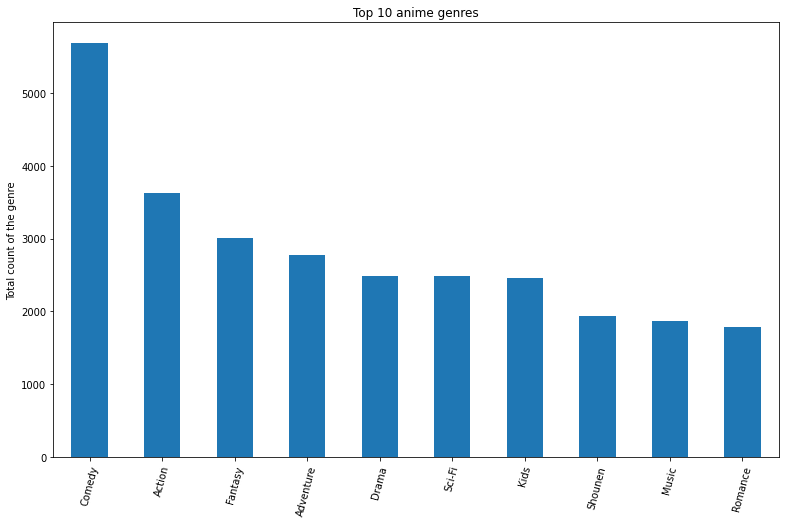

In [76]:
# Top 10 anime genres
animes_exp['genre'].value_counts()[:10].plot(kind = 'bar', figsize = (13, 8), title = 'Top 10 anime genres', rot = 75)
plt.ylabel('Total count of the genre');

### All Genres Percentage

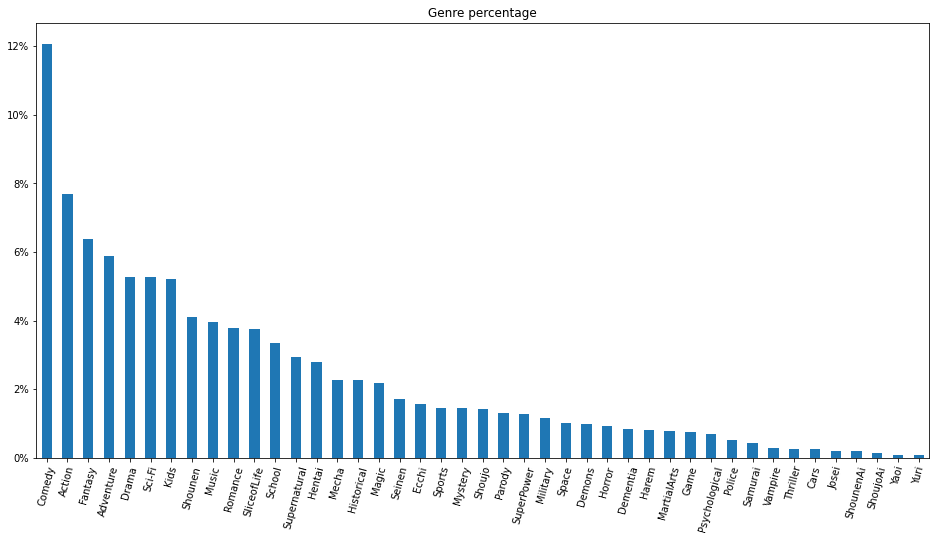

In [77]:
from matplotlib.ticker import FuncFormatter

(animes_exp['genre'].value_counts() / len(animes_exp)).plot(kind = 'bar', figsize = (16, 8), 
                                                            title = 'Genre percentage', rot = 75)

# This allows the y axis to be displayed in a % format. If I had just done a *100 after the division above, I would've had the same numbers in the y axis, but without the % symbol
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

### Shape of the Genres distribution

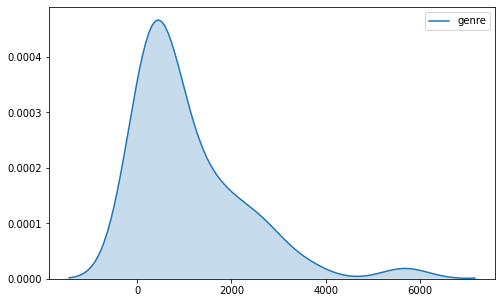

In [78]:
# Checking the shape. This basically tells us that there are a lot of genres around the 1.5k values
plt.figure(figsize = (8, 5))
sns.kdeplot(animes_exp['genre'].value_counts(), shade = True);

### Top 10 Most Watched Genres

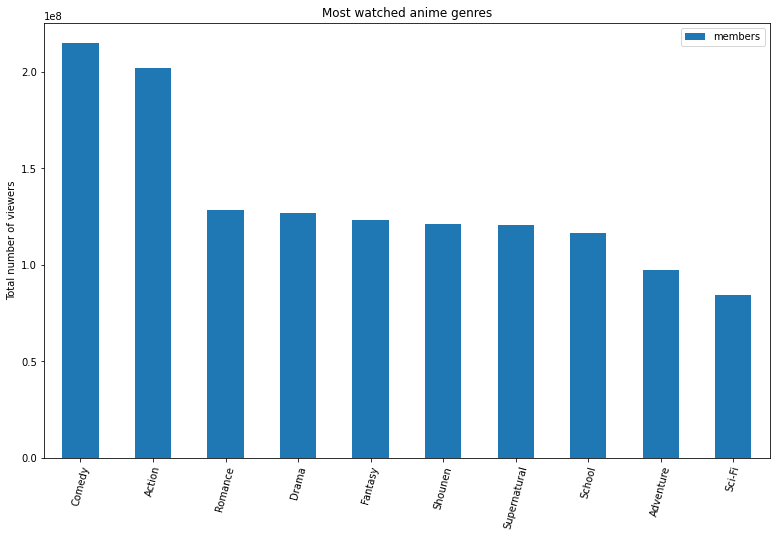

In [79]:
# Which genres are the most watched?
## with this groupby we get a new DF with the exact values for all genres. I decided to plot only the top 10
genre_memb = animes_exp.groupby('genre', as_index = False).agg({'members': 'sum'}).sort_values('members', ascending = False).reset_index(drop = True)

# Plot to visualize the most watched anime genres
genre_memb[:10].plot(x = 'genre', y = 'members', kind = 'bar', figsize = (13, 8), title = 'Most watched anime genres', rot = 75)
plt.xlabel('')  # decided to delete the x axis label as it was kind of redundant
plt.ylabel('Total number of viewers');

### Highest Scored Genres

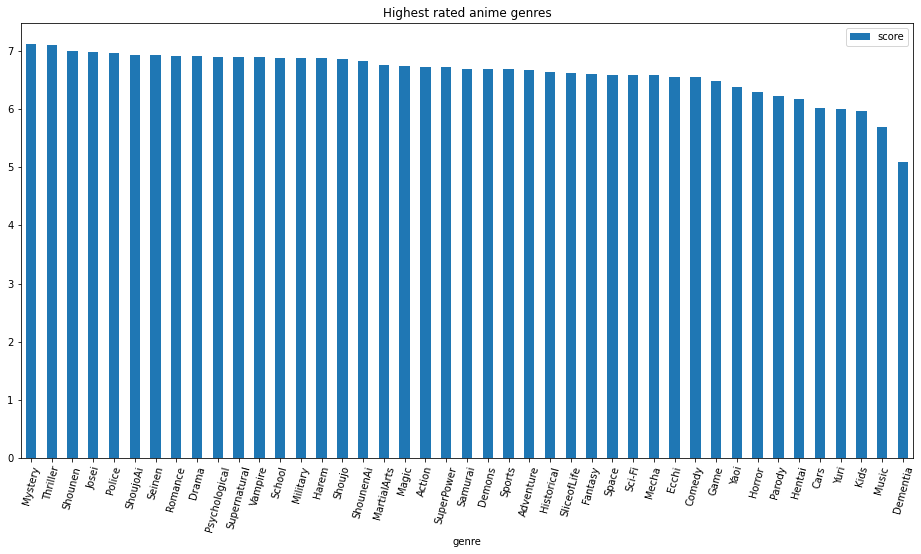

In [80]:
# Which genres are the highest scored? Comparing their means.
genre_score = animes_exp.groupby('genre', as_index = False).agg({'score': 'mean'}).sort_values('score', ascending = False).reset_index(drop = True)

# Plot to visualize the table with the highest scored anime genres
genre_score.plot(x = 'genre', y = 'score', kind = 'bar', figsize = (16, 8), title = 'Highest rated anime genres', rot = 75);

#plt.savefig('test', dpi = 300, bbox_inches = 'tight');

# We can see that there isn't much of a significant difference as one might expect, from genre to genre. They are all mostly crowded around 5-7
# Seems like people are mostly generous with their ratings, as there aren't any genres with really bad ratings, but none with outstanding ratings as well.
# I guess this was also kind of expected, in a way, as there are so many animes that encompass multiple genres, and so everything sort of gets mixed up together and averages out

### Difference between the max and min scores per anime genre

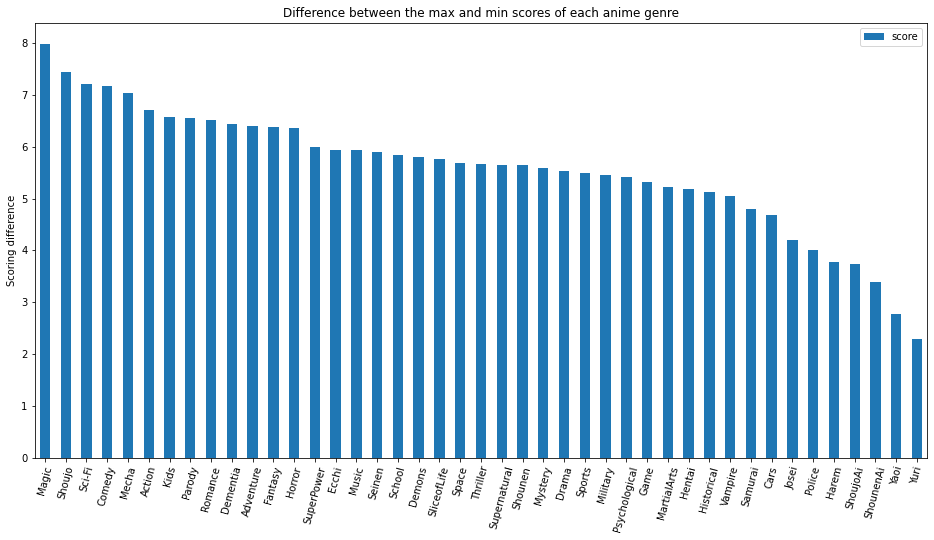

In [81]:
'''
Difference between the max and min scores of each anime genre
'y' is now representing this change - this means that there are people who really love a certain anime genre and some who hate it
'Magic' viewers are really disperse - it's the most polarizin genre, and 'yuri' viewers are more concise/consensual with their ratings,
this could maybe be explained by the fact that 'yuri' genre is a much smaller universe than that of the 'magic' genre, thus having less viewers in the first place.

The animes on the left have a greater score difference, as opposed to the ones on the right, which have a more consensual opinion amongst their viewers.
Should I have to pitch this to a decision-maker, I'd probably recommend sticking with animes that focus more on the genres to the right, as their scores tend to be more unanimous.
However, this plot alone isn't enough to make such a decision for a future anime production, other factors also have to be taken into account, namely how popular said genre is, and how much
of a reach or user engagement it can get, etc.

Taking 'yuri' as an example, what this plot tells us is that its viewers have mainly the same opinions in regards to its scores, meaning they don't fluctuate too much.
That being said, it could very well be that even though the scores don't change much, they could still be around 2-5, for instance, never reaching higher ratings.
'''
genre_score_diff = animes_exp.groupby('genre', as_index = False).agg({'score': lambda x: x.max() - x.min()}).sort_values('score', ascending = False).reset_index(drop = True)

# Plot to visualize the table with the score differences
genre_score_diff.plot(x = 'genre', y = 'score', kind = 'bar', figsize = (16, 8), title = 'Difference between the max and min scores of each anime genre', rot = 75)
plt.xlabel('')
plt.ylabel('Scoring difference');

### Most popular genres

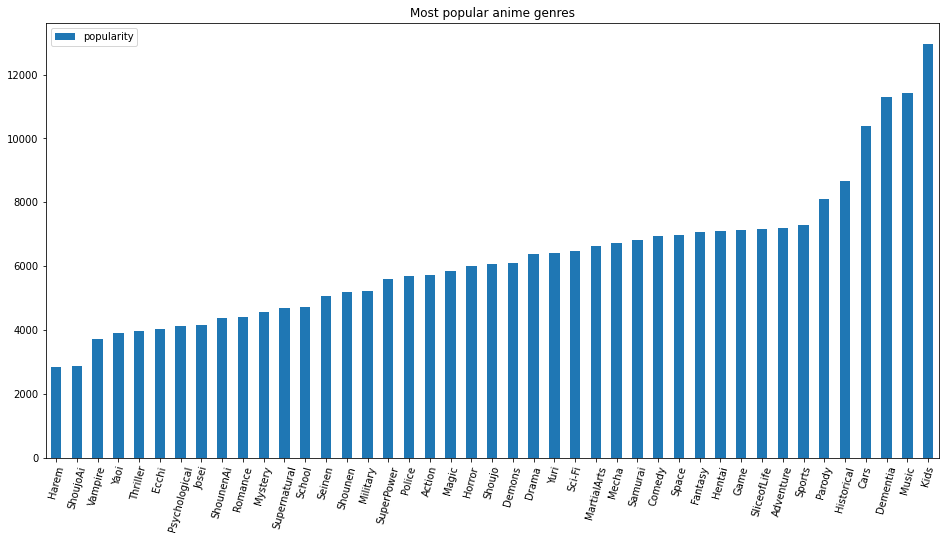

In [82]:
# Which genres are the most popular?
'''
Popularity is the ranking system based on the # of users who have a certain anime in their list (aka members).
Since this is a ranking system (created by the website), the lower the number of the y axis, the better the genre is ranked.

We can see that the most popular genre seems to be 'Harem' and the least popular one is 'Kids', followed by 'Music' and 'Dementia'.
'''
genre_pop = animes_exp.groupby('genre', as_index = False).agg({'popularity': 'mean'}).sort_values('popularity').reset_index(drop = True)

# Plot to visualize the table with the most popular anime genres
genre_pop.plot(x = 'genre', y = 'popularity', kind = 'bar', figsize = (16, 8), rot = 75, title = 'Most popular anime genres')
plt.xlabel('');

## 3.2 Gender Analysis

I wanted to deepen the analysis here, by trying to check what are the males watching more, vs the females, etc.

However, I don't think that's possible with the data I have at the moment.

### Users' gender bar plot

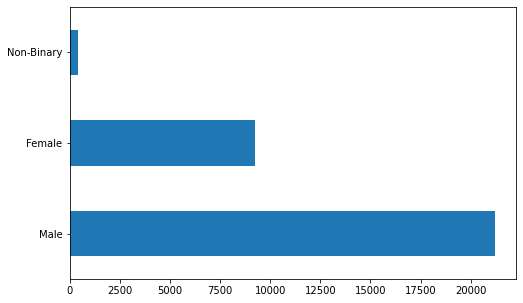

In [83]:
# Bar chart for the gender column
profiles['gender'].value_counts().plot(kind = 'barh', figsize = (8, 5));

### Users' gender pie chart

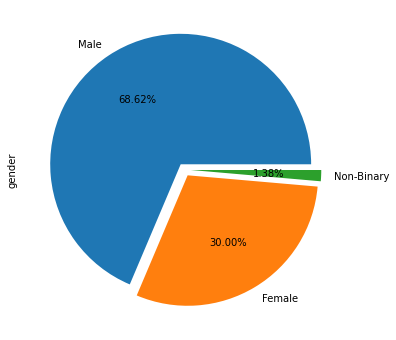

In [84]:
# We can see the vast majority are males, at almost 70%. However, females still take a pretty good chunk of the plot, with a 30% presence
explode = [0.05, 0.05, 0.05]
profiles['gender'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', explode = explode, figsize = (6, 6));

## 4. Hypothesis Testing

In [85]:
# Imports
from scipy.stats import ttest_ind #ttest_1samp, ttest_rel
from scipy.stats import f_oneway # in case wanna try anova for some reason
#f_oneway(ab_test['a'], ab_test['b'])

In [86]:
# T test between the means of the comedy genre vs the others

# Assigning each genre to a different variable for better readability below
comedy = animes_exp[animes_exp['genre'] == 'Comedy']
romance = animes_exp[animes_exp['genre'] == 'Romance']
action = animes_exp[animes_exp['genre'] == 'Action']
adventure = animes_exp[animes_exp['genre'] == 'Adventure']
fantasy = animes_exp[animes_exp['genre'] == 'Fantasy']
drama = animes_exp[animes_exp['genre'] == 'Drama']

"""
A small note from the documentation, serving as a good reminder about what this test is for:

We can use this test, if we observe two independent samples from
the same or different population, e.g. exam scores of boys and
girls or of two ethnic groups. The test measures whether the
average (expected) value differs significantly across samples. If
we observe a large p-value, for example larger than 0.05 or 0.1,
then we cannot reject the null hypothesis of identical average scores.
If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%,
then we reject the null hypothesis of equal averages.
"""

# I can reject the H0 that their means are equal
print('Comedy vs Action:', ttest_ind(comedy['members'], action['members'], equal_var = False))

# I can reject the H0 that their means are equal
print('Comedy vs Romance:', ttest_ind(comedy['members'], romance['members'], equal_var = False))

# I can reject the H0 that their means are equal
print('Comedy vs Drama:', ttest_ind(comedy['members'], drama['members'], equal_var = False))

# I cannot reject the H0 that their means are equal - would need 68% alpha to reject
print('Comedy vs Adventure:', ttest_ind(comedy['members'], adventure['members'], equal_var = False))

# I cannot reject the H0 that their means are equal - would need 78% alpha to reject
print('Comedy vs Fantasy:', ttest_ind(comedy['members'], fantasy['members'], equal_var = False))

Comedy vs Action: Ttest_indResult(statistic=-6.450804222568365, pvalue=1.1986430203709975e-10)
Comedy vs Romance: Ttest_indResult(statistic=-9.733693547857074, pvalue=5.286266403405987e-22)
Comedy vs Drama: Ttest_indResult(statistic=-4.32611412394199, pvalue=1.5557834827370583e-05)
Comedy vs Adventure: Ttest_indResult(statistic=0.9903957866733978, pvalue=0.32202851835968754)
Comedy vs Fantasy: Ttest_indResult(statistic=-1.201937562805769, pvalue=0.22943939706757024)


In [87]:
# Just checking the dementia genre for fun
dementia = animes_exp[animes_exp['genre'] == 'Dementia']
dementia.sort_values('aired', ascending = False).head(30)

,anime_id,title,synopsis,genre,aired,episodes,members,popularity,ranked,score
17854,35842,FLCL Alternative,Life seems to drift by for Kana Koumoto and he...,Dementia,"Sep 7, 2018",1.0,57195,1729,4952.0,6.73
7630,31501,Master Blaster,Short film by Kabuki Sawako with music by Suga...,Dementia,"Sep 30, 2014",1.0,532,10858,11373.0,4.19
5044,39872,Chiruri,The story of a boy and a girl who try to find ...,Dementia,"Sep 29, 2011",1.0,156,14335,8408.0,5.98
12032,33010,FLCL Progressive,Hidomi Hibajiri is a dissilusioned young girl ...,Dementia,"Sep 28, 2018",1.0,86206,1262,5860.0,6.54
13546,40209,Subarashii Shigoto,An office worker observes and reports on the w...,Dementia,"Sep 28, 2015",1.0,74,15911,14041.0,4.61
4272,2346,Koroshiya 1 The Animation: Episode 0,A masochistic mobster meets his match in the d...,Dementia,"Sep 27, 2002",1.0,7649,4830,8985.0,5.80
7243,39996,Ake-Vono,Music video directed by Kouhei Yoshino for the...,Dementia,"Sep 26, 2013",1.0,96,15447,9705.0,5.56
13493,40159,The Ghost of Cartoon,Space Shower TV Station ID directed by Ryuu Oo...,Dementia,"Sep 24, 2015",1.0,74,15868,14198.0,4.41
5042,9990,Midori-ko,One of the must-see gems making its premiere a...,Dementia,"Sep 24, 2011",1.0,1584,8505,8391.0,5.99
7734,5622,The Chocolate Panic Picture Show,"Gainax's first professional production, The Ch...",Dementia,"Sep 21, 1985",1.0,2133,7803,11272.0,4.54


In [88]:
# Decided to do a correlation table just to see what values it would give me
merged.corr()
# pop and ranked 0.74, members and overall_score 0.52
# ranked and overall_score -0.9

,anime_id,episodes,members,popularity,ranked,overall_score,user_id,user_score
anime_id,1.000000,-0.176906,-0.113542,0.122962,0.185021,-0.126641,0.603954,-0.114948
episodes,-0.176906,1.000000,0.200632,-0.105627,-0.139891,0.153346,-0.072999,0.066069
members,-0.113542,0.200632,1.000000,-0.452500,-0.456746,0.521908,0.002510,0.164081
popularity,0.122962,-0.105627,-0.452500,1.000000,0.743393,-0.617258,-0.010378,-0.176555
ranked,0.185021,-0.139891,-0.456746,0.743393,1.000000,-0.917797,0.031926,-0.412110
overall_score,-0.126641,0.153346,0.521908,-0.617258,-0.917797,1.000000,-0.004423,0.425944
user_id,0.603954,-0.072999,0.002510,-0.010378,0.031926,-0.004423,1.000000,-0.126613
user_score,-0.114948,0.066069,0.164081,-0.176555,-0.412110,0.425944,-0.126613,1.000000


### Exporting some cleaned dataframes to try using with Tableau/Power BI

In [89]:
#animes.to_csv('Datasets/myanimelist-dataset-animes-profiles-reviews/animes_cleaned.csv')

#animes_exp.to_csv('Datasets/myanimelist-dataset-animes-profiles-reviews/animes_exp.csv', index = False)

#profiles.to_csv('Datasets/myanimelist-dataset-animes-profiles-reviews/profiles_cleaned.csv')